Installing Libraries

In [1]:
pip install distfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install dataloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for dataloader: filename=dataloader-2.0-py3-none-any.whl size=10100 sha256=407b23780f8b3661fe2fde649865cea471dbd906481f9ae04bbd477fc19433e7
  Stored in directory: /root/.cache/pip/wheels/97/15/34/fb3fcd05c49775824250f2ed4d0d983306962b4ff9052dc60f
Successfully built dataloader


In [3]:
pip install umap_learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 29.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=7afc61f276f4081a0e31d454b62d07d3fe625c4fd3b6d8c7affab49776e9eb6f
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=4bd80556da5905ba8a5c56f2c3024e6e498e163dd5e80addae1318681f5289f8
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8b4be1ad6d21bf5019235c2eff65928
Successfully built umap-learn pynndescent


In [4]:
pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.8 MB/s 


In [6]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 702 kB/s 


Imports

In [7]:
from numpy import mean
import pandas as pd
import numpy as np
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
import math
import pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import pandas as pd
from numpy import mean
import pandas as pd
import numpy as np
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from numpy import mean
import pandas as pd
import numpy as np
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
#import lazypredict
#from lazypredict.Supervised import LazyRegressor
#from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler

In [9]:
import shap
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import time

Reading in the train and test data

In [11]:
dftrain=pd.read_csv('/content/train.csv')

In [12]:
dftest=pd.read_csv('/content/test.csv')

Integrating with Auxillary Data 

In [13]:
cc=pd.read_csv('/content/sg-commerical-centres.csv')
mr=pd.read_csv('/content/sg-mrt-stations.csv')
sm=pd.read_csv('/content/sg-shopping-malls.csv')
ps=pd.read_csv('/content/sg-shopping-malls.csv')
ss=pd.read_csv('/content/sg-secondary-schools.csv')

In [14]:
import math 
dcc=np.zeros((len(dftrain),len(cc)))

for i in range(len(dftrain)):
  for j in range(len(cc)):
  
    dcc[i][j]=math.sqrt((dftrain['lat'][i]-cc['lat'][j])**2+(dftrain['lng'][i]-cc['lng'][j])**2)

dftrain['cc']=pd.DataFrame(dcc).min(axis=1)

In [15]:
import math 

dmr=np.zeros((len(dftrain),len(mr)))

for i in range(len(dftrain)):
  for j in range(len(mr)):
    dmr[i][j]=math.sqrt((dftrain['lat'][i]-mr['lat'][j])**2+(dftrain['lng'][i]-mr['lng'][j])**2)

dftrain['mr']=pd.DataFrame(dmr).min(axis=1)

In [16]:
import math
  
dsm=np.zeros((len(dftrain),len(sm)))

for i in range(len(dftrain)):
  for j in range(len(sm)):
    dsm[i][j]=math.sqrt((dftrain['lat'][i]-sm['lat'][j])**2+(dftrain['lng'][i]-sm['lng'][j])**2)

dftrain['sm']=pd.DataFrame(dsm).min(axis=1)

In [17]:
import math 
  
dps=np.zeros((len(dftrain),len(ps)))

for i in range(len(dftrain)):
  for j in range(len(ps)):
    dps[i][j]=math.sqrt((dftrain['lat'][i]-ps['lat'][j])**2+(dftrain['lng'][i]-ps['lng'][j])**2)

dftrain['ps']=pd.DataFrame(dps).min(axis=1)

In [18]:
import math

dss=np.zeros((len(dftrain),len(ss)))

for i in range(len(dftrain)):
  for j in range(len(ss)):
    dss[i][j]=math.sqrt((dftrain['lat'][i]-ss['lat'][j])**2+(dftrain['lng'][i]-ss['lng'][j])**2)

dftrain['ss']=pd.DataFrame(dss).min(axis=1)

In [19]:
import math

tdcc=np.zeros((len(dftest),len(cc)))

for i in range(len(dftest)):
  for j in range(len(cc)):
    tdcc[i][j]=math.sqrt((dftest['lat'][i]-cc['lat'][j])**2+(dftest['lng'][i]-cc['lng'][j])**2)

dftest['cc']=pd.DataFrame(tdcc).min(axis=1)


tdmr=np.zeros((len(dftest),len(mr)))

for i in range(len(dftest)):
  for j in range(len(mr)):
    tdmr[i][j]=math.sqrt((dftest['lat'][i]-mr['lat'][j])**2+(dftest['lng'][i]-mr['lng'][j])**2)

dftest['mr']=pd.DataFrame(tdmr).min(axis=1)

  
tdsm=np.zeros((len(dftest),len(sm)))
for i in range(len(dftest)):
  for j in range(len(sm)):

    tdsm[i][j]=math.sqrt((dftest['lat'][i]-sm['lat'][j])**2+(dftest['lng'][i]-sm['lng'][j])**2)

dftest['sm']=pd.DataFrame(tdsm).min(axis=1)


tdps=np.zeros((len(dftest),len(ps)))
for i in range(len(dftest)):
  for j in range(len(ps)):
    tdps[i][j]=math.sqrt((dftest['lat'][i]-ps['lat'][j])**2+(dftest['lng'][i]-ps['lng'][j])**2)

dftest['ps']=pd.DataFrame(tdps).min(axis=1)


tdss=np.zeros((len(dftest),len(ss)))
for i in range(len(dftest)):
  for j in range(len(ss)):
    tdss[i][j]=math.sqrt((dftest['lat'][i]-ss['lat'][j])**2+(dftest['lng'][i]-ss['lng'][j])**2)

dftest['ss']=pd.DataFrame(tdss).min(axis=1)

Looking at the nature of the price distribution

Heavy tailedness is observed

[distfit] >fit..
[distfit] >transform..
[smoothline] >Smoothing by interpolation..
[distfit] >[norm      ] [0.00 sec] [RSS: 2.52797e-19] [loc=5228263.494 scale=277967918.886]
[distfit] >[expon     ] [0.00 sec] [RSS: 9.55308e-20] [loc=0.000 scale=5228263.494]
[distfit] >[pareto    ] [1.21 sec] [RSS: 7.72669e-20] [loc=-2.805 scale=2.532]
[distfit] >[dweibull  ] [1.50 sec] [RSS: 6.26897e-20] [loc=682500.000 scale=139839875.920]
[distfit] >[t         ] [0.58 sec] [RSS: 9.53483e-20] [loc=1446205.869 scale=937511.613]
[distfit] >[genextreme] [2.15 sec] [RSS: 8.19369e-20] [loc=3.557 scale=34.583]
[distfit] >[gamma     ] [0.11 sec] [RSS: 9.55308e-20] [loc=40738088609.882 scale=0.000]
[distfit] >[lognorm   ] [1.04 sec] [RSS: 9.55307e-20] [loc=-56827.216 scale=1845248.306]
[distfit] >[beta      ] [0.99 sec] [RSS: 9.55308e-20] [loc=-0.000 scale=3024121122925.381]
[distfit] >[uniform   ] [0.00 sec] [RSS: 8.91014e-20] [loc=0.000 scale=39242425300.000]
[distfit] >[loggamma  ] [0.41 sec] [RSS: 2.7230

(<Figure size 1080x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9b90e5d0d0>)

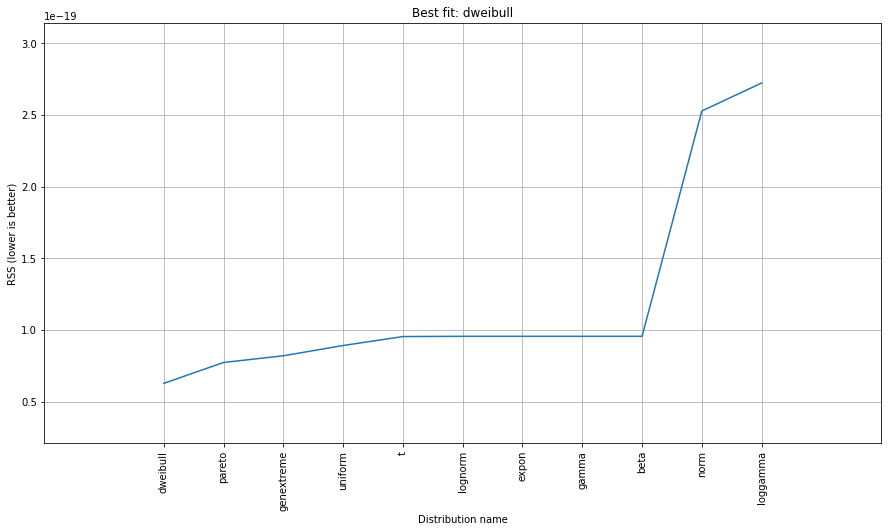

In [20]:

from distfit import distfit


dist = distfit(alpha=0.05, smooth=10)

dist.fit_transform(dftrain['price'])

best_distr = dist.model
print(best_distr)

dist.summary

dist.plot_summary()

Normal distribution is a poor fit.

The Weibull distribution is well known for it's applications in financial modelling.

The Pareto distribution's relatively good fit shows that there is a substantial heavy tailed nature.

In [21]:
dfnumericalvariables=dftrain[['built_year','num_beds','num_baths','size_sqft','lat','lng','price']]

Observe that some of the price values that are out of proportion

Filtering

In [24]:
df2=dftrain[dftrain['price']<10000000]

In [25]:
df21=df2[df2['size_sqft']<27600]

In [26]:
df22=df21[df21['price']>900]

In [27]:
df23=df22[df21['built_year']<2029]

In [28]:
df24=df23[df23['size_sqft']>210]

In [29]:
df3=df24.drop(columns=['listing_id','elevation','floor_level','available_unit_types','total_num_units'])

Creating a category out of the Nan as deemed not worth it to lose that many points

In [30]:
df3['tenure']=df3['tenure'].fillna('notknown')

In [31]:
df4=df3.dropna()

In [32]:
df4

title  \
0              hdb flat for sale in 866 yishun street 81   
1      hdb flat for sale in 506b serangoon north aven...   
2                     4 bed condo for sale in meyerhouse   
3                   3 bed condo for sale in leedon green   
4                     2 bed condo for sale in one bernam   
...                                                  ...   
20249              2 bed condo for sale in lentor modern   
20250                       2 bed condo for sale in mori   
20251  4 bed condo for sale in pullman residences newton   
20252       hdb flat for sale in 691d woodlands drive 73   
20253  4 bed condo for sale in pullman residences newton   

                                  address              property_name  \
0                sembawang / yishun (d27)       866 yishun street 81   
1      hougang / punggol / sengkang (d19)       hdb-serangoon estate   
2                          128 meyer road                 meyerhouse   
3                       26 leedon heights               leedon green   
4                         1 bernam street                 one bernam   
...                                   ...                        ...   
20249                      lentor central              lentor modern   
20250                 223 guillemard road                       mori   
20251                     18 dunearn road  pullman residences newton   
20252         admiralty / woodlands (d25)            admiralty flora   
20253                     18 dunearn road  pullman residences newton   

      property_type             tenure  built_year  num_beds  num_baths  \
0       hdb 4 rooms           notknown     1988.00      3.00       2.00   
1               hdb  99-year leasehold     1992.00      4.00       2.00   
2             condo           freehold     2022.00      4.00       6.00   
3             Condo           freehold     2023.00      3.00       2.00   
4             condo  99-year leasehold     2026.00      2.00       1.00   
...             ...                ...         ...       ...        ...   
20249         condo  99-year leasehold     2026.00      2.00       2.00   
20250         Condo           freehold     2026.00      2.00       2.00   
20251         condo           freehold     2023.00      4.00       4.00   
20252   hdb 5 rooms  99-year leasehold     2017.00      3.00       2.00   
20253         condo           freehold     2023.00      4.00       4.00   

       size_sqft   furnishing  ...  lat    lng          subzone  \
0           1115  unspecified  ... 1.41 103.84     yishun south   
1           1575  unspecified  ... 1.37 103.88  serangoon north   
2           3070      partial  ... 1.30 103.90      mountbatten   
3            958      partial  ... 1.31 103.80     farrer court   
4            732  unspecified  ... 1.27 103.84            anson   
...          ...          ...  ...  ...    ...              ...   
20249        635  unspecified  ... 1.39 103.83           tagore   
20250        883  unspecified  ... 1.32 103.86         lavender   
20251       1378  unspecified  ... 1.32 103.84         moulmein   
20252       1205  unfurnished  ... 1.44 103.81   woodlands east   
20253       1378      partial  ... 1.32 103.84         moulmein   

       planning_area      price   cc   mr   sm   ps   ss  
0             yishun  514500.00 0.03 0.01 0.01 0.01 0.00  
1          serangoon  995400.00 0.02 0.02 0.00 0.00 0.00  
2      marine parade 8485000.00 0.02 0.01 0.01 0.01 0.01  
3        bukit timah 2626000.00 0.01 0.01 0.01 0.01 0.01  
4      downtown core 1764000.00 0.02 0.00 0.00 0.00 0.01  
...              ...        ...  ...  ...  ...  ...  ...  
20249     ang mo kio 1050000.00 0.03 0.00 0.02 0.02 0.01  
20250        kallang 2087400.00 0.01 0.00 0.00 0.00 0.01  
20251         novena 4193700.00 0.01 0.00 0.01 0.01 0.00  
20252      woodlands  754800.00 0.02 0.01 0.01 0.01 0.01  
20253         novena 4178000.00 0.01 0.00 0.01 0.01 0.00  

[17932 rows x 21 columns]

Numerical

In [33]:
dfnumerical=df4[['built_year','num_beds','num_baths','size_sqft','lat','lng','price','cc','mr','ps','ss','sm']]

In [34]:
trainnum=df4[['built_year','num_beds','num_baths','size_sqft','lat','lng','cc','mr','ps','ss','sm']]

Pairwise plot post cleaning

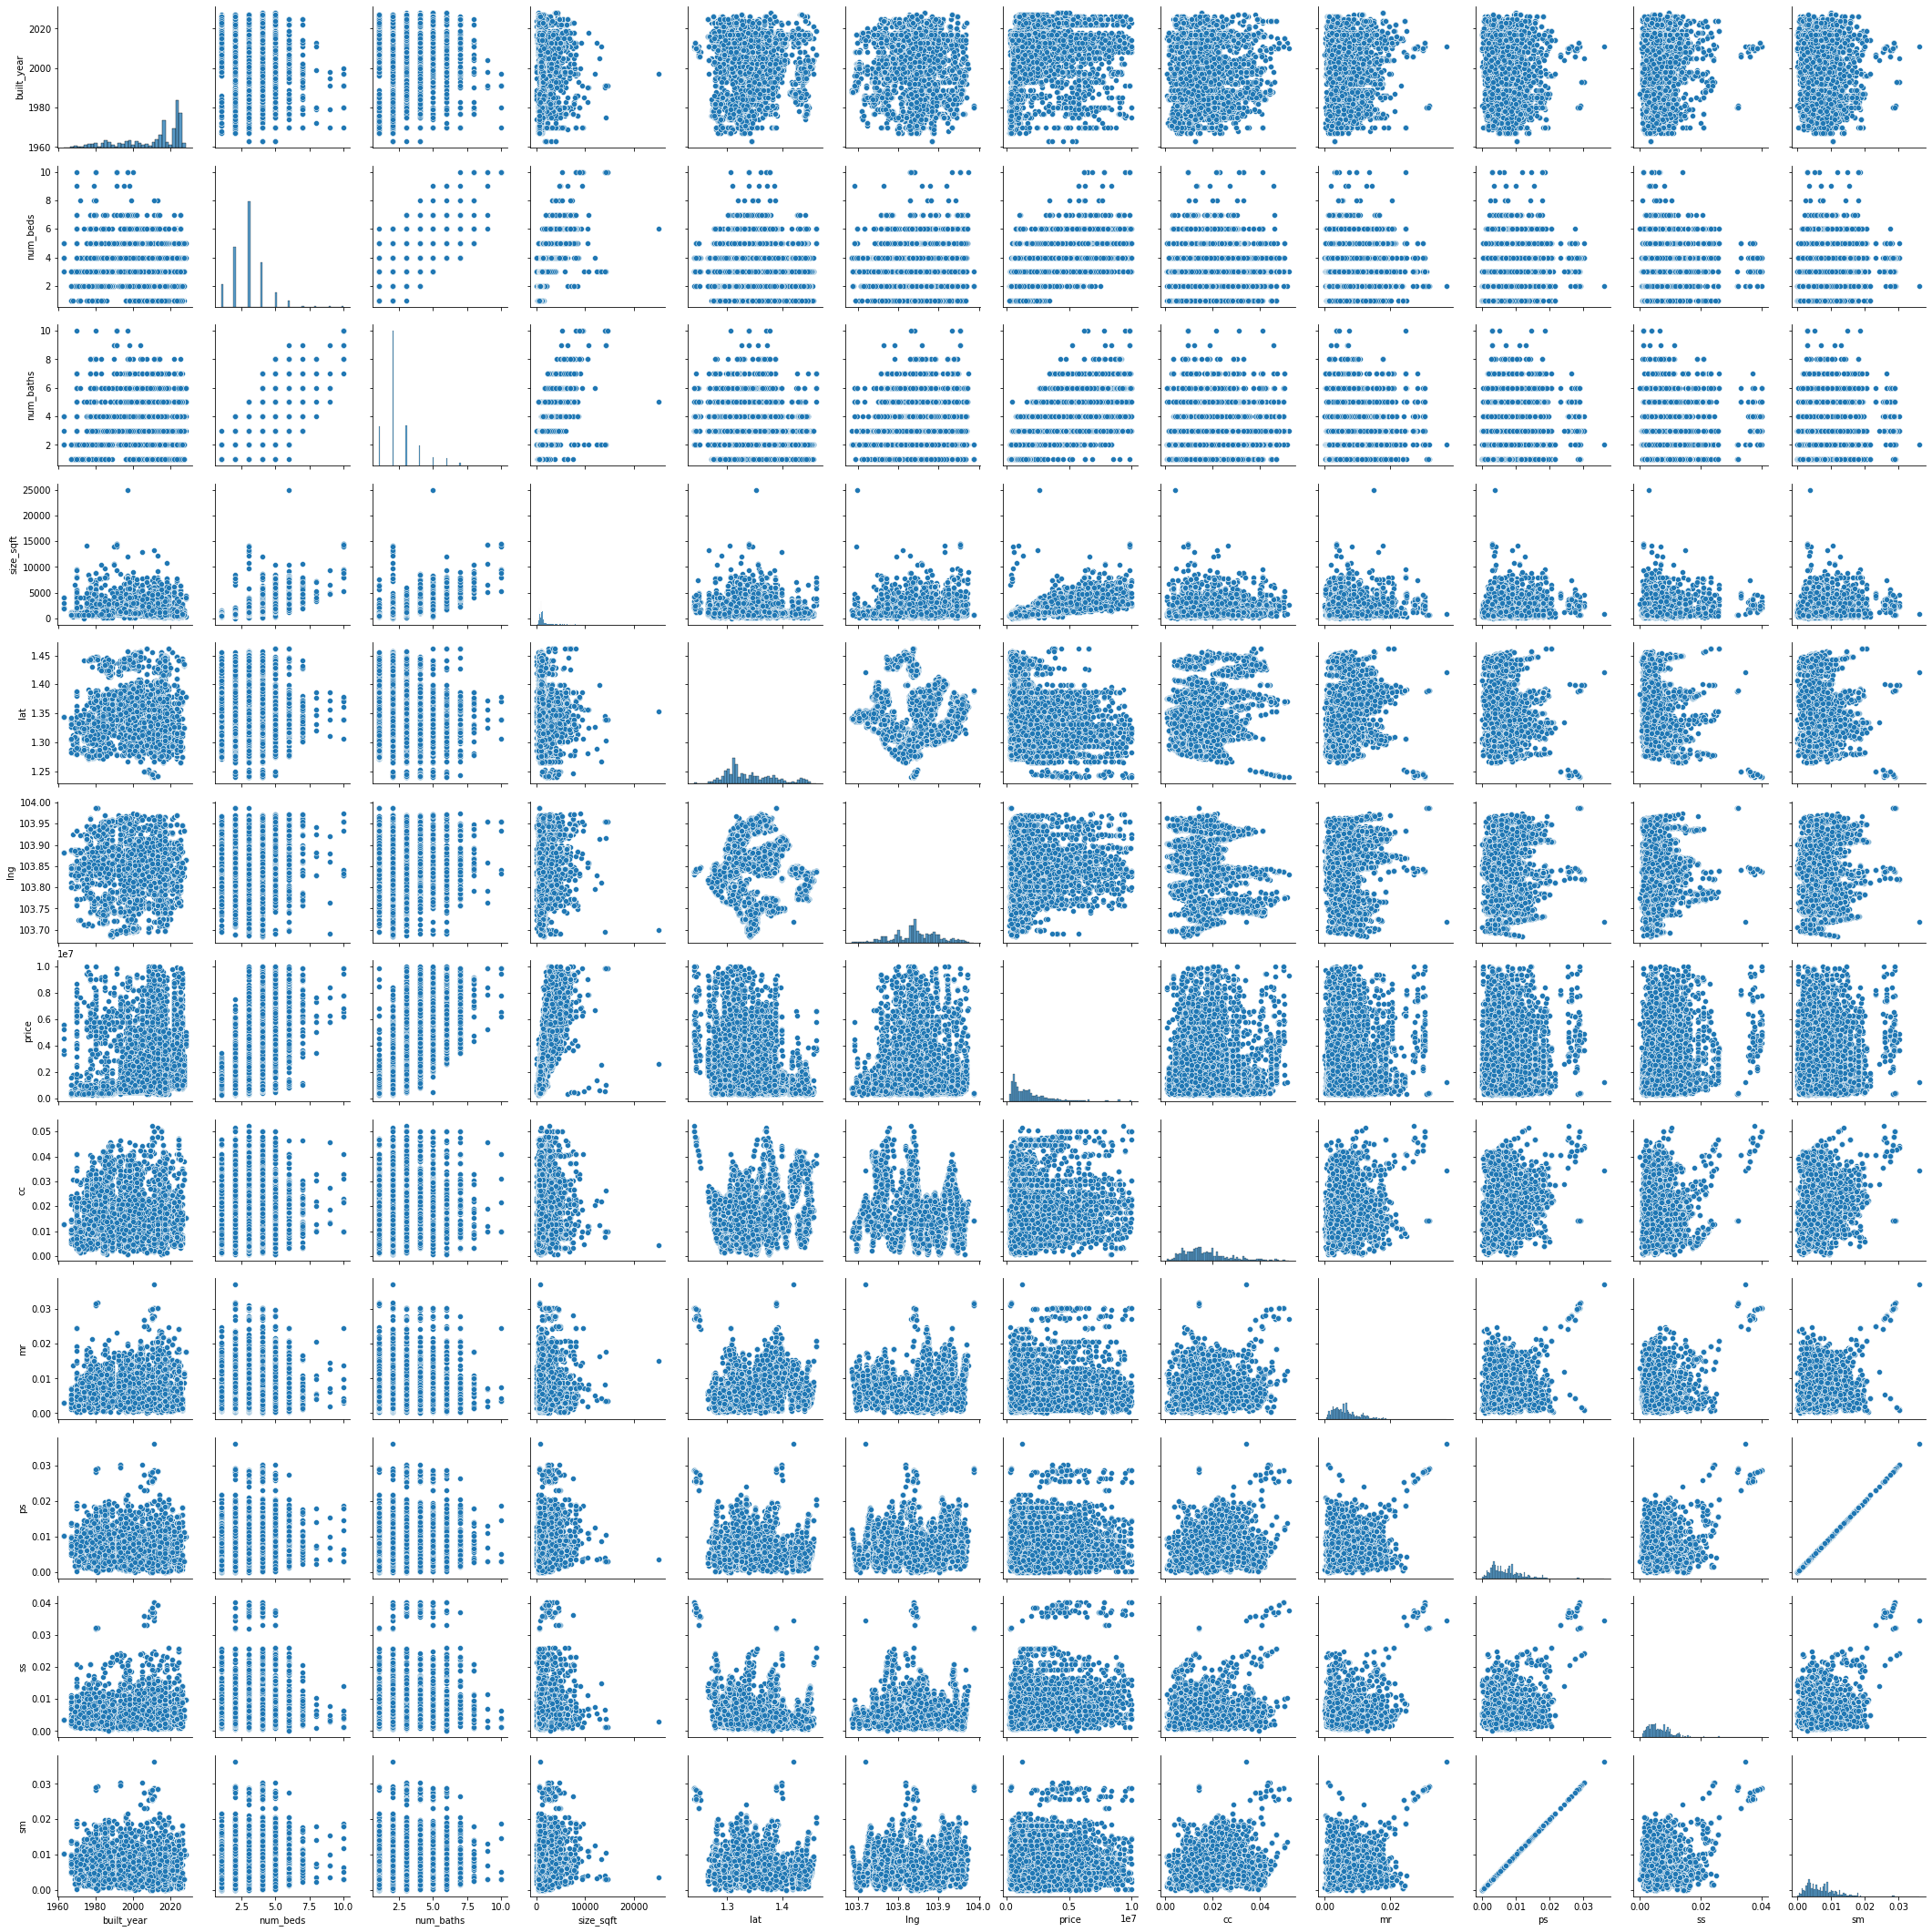

In [ ]:
import seaborn as sns
sns.pairplot(dfnumerical)

Categorical

In [35]:
dfcat=df4[['property_type','tenure','furnishing']]

In [36]:
dfcategoricalencoding=pd.get_dummies(dfcat)

Target encoding

In [37]:
dftar=df4[['property_details_url','title','address','property_name']]

In [38]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

dftarenc=encoder.fit_transform(dftar,df4['price'])

In [39]:
dataframes=[dfnumerical,dfcategoricalencoding,dftarenc]
dfinput=pd.concat(dataframes,axis=1)

In [40]:
X=dfinput.drop(columns=["price"])
y=dfinput['price']

In [43]:
dfsamp=dfinput.sample(2000)

In [44]:
X1=dfsamp.drop(columns=["price"])
y1=dfsamp['price']

Test Train Split

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.2)

Fitting 40 baseline regression models

In [49]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

reg0 = LazyRegressor(verbose=1, ignore_warnings=True, custom_metric=None)
models, predictions = reg0.fit(X_train, X_test, y_train, y_test)

  2%|▏         | 1/42 [00:00<00:21,  1.93it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9137585780696174, 'Adjusted R-Squared': 0.8963544356921004, 'RMSE': 624726.0694567389, 'Time taken': 0.5156021118164062}


 10%|▉         | 4/42 [00:01<00:07,  4.82it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.937749904188399, 'Adjusted R-Squared': 0.9251873848529253, 'RMSE': 530764.2794408292, 'Time taken': 0.2979881763458252}
{'Model': 'BayesianRidge', 'R-Squared': 0.8975517389575122, 'Adjusted R-Squared': 0.8768769392892992, 'RMSE': 680900.9976347483, 'Time taken': 0.06120109558105469}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9232069321701971, 'Adjusted R-Squared': 0.907709535951532, 'RMSE': 589512.0459623553, 'Time taken': 0.11614632606506348}
{'Model': 'DummyRegressor', 'R-Squared': -0.004798690809743933, 'Adjusted R-Squared': -0.20757433022014404, 'RMSE': 2132412.4291294627, 'Time taken': 0.033606767654418945}
{'Model': 'ElasticNet', 'R-Squared': 0.8893564990739528, 'Adjusted R-Squared': 0.8670278407545395, 'RMSE': 707611.0879236232, 'Time taken': 0.038768768310546875}


 17%|█▋        | 7/42 [00:01<00:05,  6.60it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.0017323296951752276, 'Adjusted R-Squared': -0.19972530256513576, 'RMSE': 2125470.9722089516, 'Time taken': 0.24214982986450195}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9320903747960132, 'Adjusted R-Squared': 0.9183857215168953, 'RMSE': 554366.9639678115, 'Time taken': 0.08209848403930664}


 24%|██▍       | 10/42 [00:03<00:12,  2.49it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9524265895643792, 'Adjusted R-Squared': 0.942825931434299, 'RMSE': 463995.552792196, 'Time taken': 1.9376561641693115}
{'Model': 'GammaRegressor', 'R-Squared': 0.7609159906671726, 'Adjusted R-Squared': 0.7126671092656682, 'RMSE': 1040176.2657520487, 'Time taken': 0.18508315086364746}


 26%|██▌       | 11/42 [00:04<00:19,  1.62it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.717035975156048, 'Adjusted R-Squared': -1.0635462472507928, 'RMSE': 2787541.6956946105, 'Time taken': 1.3654489517211914}


 29%|██▊       | 12/42 [00:05<00:19,  1.57it/s]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9494548227553509, 'Adjusted R-Squared': 0.9392544406005572, 'RMSE': 478268.2343760554, 'Time taken': 0.6835980415344238}


 33%|███▎      | 14/42 [00:06<00:15,  1.78it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9588326040382305, 'Adjusted R-Squared': 0.9505247259375119, 'RMSE': 431626.77095852804, 'Time taken': 0.9702768325805664}
{'Model': 'HuberRegressor', 'R-Squared': 0.8885163230278201, 'Adjusted R-Squared': 0.8660181111087356, 'RMSE': 710292.6441012648, 'Time taken': 0.11898207664489746}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8712774706544602, 'Adjusted R-Squared': 0.8453003337082217, 'RMSE': 763236.1943586009, 'Time taken': 0.06808233261108398}


 43%|████▎     | 18/42 [00:07<00:06,  3.83it/s]

{'Model': 'KernelRidge', 'R-Squared': -0.21179035503302712, 'Adjusted R-Squared': -0.45633840860896946, 'RMSE': 2341776.377139434, 'Time taken': 0.1642754077911377}
{'Model': 'Lars', 'R-Squared': -3.80018892748262e+17, 'Adjusted R-Squared': -4.567094524293872e+17, 'RMSE': 1311397251360539.0, 'Time taken': 0.039313554763793945}
{'Model': 'LarsCV', 'R-Squared': 0.8900467930144819, 'Adjusted R-Squared': 0.8678574410023442, 'RMSE': 705400.2762130508, 'Time taken': 0.12994670867919922}


 45%|████▌     | 19/42 [00:07<00:05,  4.25it/s]

{'Model': 'Lasso', 'R-Squared': 0.897734869196261, 'Adjusted R-Squared': 0.8770970265340606, 'RMSE': 680292.1569648539, 'Time taken': 0.13349080085754395}


 48%|████▊     | 20/42 [00:07<00:05,  4.20it/s]

{'Model': 'LassoCV', 'R-Squared': 0.890591759048207, 'Adjusted R-Squared': 0.8685123851211884, 'RMSE': 703650.0011919708, 'Time taken': 0.24489450454711914}
{'Model': 'LassoLars', 'R-Squared': 0.8977282761926916, 'Adjusted R-Squared': 0.8770891030147107, 'RMSE': 680314.0857312714, 'Time taken': 0.06461548805236816}


 60%|█████▉    | 25/42 [00:07<00:02,  8.48it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8900467930144819, 'Adjusted R-Squared': 0.8678574410023442, 'RMSE': 705400.2762130508, 'Time taken': 0.1311018466949463}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8941033086311657, 'Adjusted R-Squared': 0.8727325907946841, 'RMSE': 692265.7902421149, 'Time taken': 0.05054068565368652}
{'Model': 'LinearRegression', 'R-Squared': -2.1713235126218597e+22, 'Adjusted R-Squared': -2.6095122937835e+22, 'RMSE': 3.1346852659138566e+17, 'Time taken': 0.03011322021484375}
{'Model': 'LinearSVR', 'R-Squared': -1.254403052635113, 'Adjusted R-Squared': -1.709357885546416, 'RMSE': 3194092.2634842596, 'Time taken': 0.03653120994567871}
{'Model': 'MLPRegressor', 'R-Squared': -1.2491420855550817, 'Adjusted R-Squared': -1.703035217278547, 'RMSE': 3190363.15450384, 'Time taken': 2.589028835296631}


 64%|██████▍   | 27/42 [00:10<00:07,  1.92it/s]

{'Model': 'NuSVR', 'R-Squared': -0.06350595397834202, 'Adjusted R-Squared': -0.2781291434860196, 'RMSE': 2193823.2649781615, 'Time taken': 0.2759685516357422}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8709625633044742, 'Adjusted R-Squared': 0.8449218757785699, 'RMSE': 764169.2162259363, 'Time taken': 0.02921009063720703}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8709625633044742, 'Adjusted R-Squared': 0.8449218757785699, 'RMSE': 764169.2162259363, 'Time taken': 0.04656076431274414}


 71%|███████▏  | 30/42 [00:11<00:04,  2.49it/s]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.40634600777372043, 'Adjusted R-Squared': 0.2865423406678146, 'RMSE': 1639073.2829500285, 'Time taken': 0.5799601078033447}
{'Model': 'PoissonRegressor', 'R-Squared': 0.8506205756015781, 'Adjusted R-Squared': 0.8204747279067158, 'RMSE': 822199.230099901, 'Time taken': 0.08665347099304199}


 76%|███████▌  | 32/42 [02:53<03:45, 22.55s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.14847107085082611, 'Adjusted R-Squared': -0.3802408351490352, 'RMSE': 2279773.520351132, 'Time taken': 162.49372458457947}


 79%|███████▊  | 33/42 [02:54<02:50, 18.91s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -9.426172271878698e+22, 'Adjusted R-Squared': -1.1328441977348194e+23, 'RMSE': 6.531295920602373e+17, 'Time taken': 0.2970454692840576}


 88%|████████▊ | 37/42 [02:56<00:43,  8.65s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9533193893814835, 'Adjusted R-Squared': 0.9438989047084697, 'RMSE': 459621.08022677473, 'Time taken': 1.6915321350097656}
{'Model': 'Ridge', 'R-Squared': 0.8975198982633172, 'Adjusted R-Squared': 0.8768386729128421, 'RMSE': 681006.8006807531, 'Time taken': 0.023609638214111328}
{'Model': 'RidgeCV', 'R-Squared': 0.8975464192438608, 'Adjusted R-Squared': 0.8768705460189773, 'RMSE': 680918.6755888456, 'Time taken': 0.0368959903717041}
{'Model': 'SGDRegressor', 'R-Squared': 0.8939863559302506, 'Adjusted R-Squared': 0.8725920361932831, 'RMSE': 692647.9552154846, 'Time taken': 0.05052065849304199}


 93%|█████████▎| 39/42 [02:56<00:18,  6.13s/it]

{'Model': 'SVR', 'R-Squared': -0.14845356970319057, 'Adjusted R-Squared': -0.3802198021432923, 'RMSE': 2279756.1499506193, 'Time taken': 0.3768472671508789}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -2.1713235126218597e+22, 'Adjusted R-Squared': -2.6095122937835e+22, 'RMSE': 3.1346852659138566e+17, 'Time taken': 0.03747153282165527}
{'Model': 'TweedieRegressor', 'R-Squared': 0.8763169465275686, 'Adjusted R-Squared': 0.8513568122424695, 'RMSE': 748146.7164743793, 'Time taken': 0.03628396987915039}
[16:38:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 98%|█████████▊| 41/42 [02:56<00:04,  4.37s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9524479726728173, 'Adjusted R-Squared': 0.9428516298085967, 'RMSE': 463891.26362869155, 'Time taken': 0.45943760871887207}


100%|██████████| 42/42 [02:57<00:00,  4.22s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9589724346023913, 'Adjusted R-Squared': 0.9506927753203438, 'RMSE': 430893.108416442, 'Time taken': 0.3316385746002197}


In [50]:
models

Adjusted R-Squared  \
Model                                                        
LGBMRegressor                                         0.95   
HistGradientBoostingRegressor                         0.95   
RandomForestRegressor                                 0.94   
XGBRegressor                                          0.94   
ExtraTreesRegressor                                   0.94   
GradientBoostingRegressor                             0.94   
BaggingRegressor                                      0.93   
ExtraTreeRegressor                                    0.92   
DecisionTreeRegressor                                 0.91   
AdaBoostRegressor                                     0.90   
Lasso                                                 0.88   
LassoLars                                             0.88   
BayesianRidge                                         0.88   
RidgeCV                                               0.88   
Ridge                                                 0.88   
LassoLarsIC                                           0.87   
SGDRegressor                                          0.87   
LassoCV                                               0.87   
LassoLarsCV                                           0.87   
LarsCV                                                0.87   
ElasticNet                                            0.87   
HuberRegressor                                        0.87   
TweedieRegressor                                      0.85   
KNeighborsRegressor                                   0.85   
OrthogonalMatchingPursuit                             0.84   
OrthogonalMatchingPursuitCV                           0.84   
PoissonRegressor                                      0.82   
GammaRegressor                                        0.71   
PassiveAggressiveRegressor                            0.29   
ElasticNetCV                                         -0.20   
DummyRegressor                                       -0.21   
NuSVR                                                -0.28   
SVR                                                  -0.38   
QuantileRegressor                                    -0.38   
KernelRidge                                          -0.46   
GaussianProcessRegressor                             -1.06   
MLPRegressor                                         -1.70   
LinearSVR                                            -1.71   
Lars                                -456709452429387200.00   
LinearRegression               -26095122937835000168448.00   
TransformedTargetRegressor     -26095122937835000168448.00   
RANSACRegressor               -113284419773481944612864.00   

                                                R-Squared  \
Model                                                       
LGBMRegressor                                        0.96   
HistGradientBoostingRegressor                        0.96   
RandomForestRegressor                                0.95   
XGBRegressor                                         0.95   
ExtraTreesRegressor                                  0.95   
GradientBoostingRegressor                            0.95   
BaggingRegressor                                     0.94   
ExtraTreeRegressor                                   0.93   
DecisionTreeRegressor                                0.92   
AdaBoostRegressor                                    0.91   
Lasso                                                0.90   
LassoLars                                            0.90   
BayesianRidge                                        0.90   
RidgeCV                                              0.90   
Ridge                                                0.90   
LassoLarsIC                                          0.89   
SGDRegressor                                         0.89   
LassoCV                                              0.89   
LassoLarsCV                                          0.89   
LarsCV                        

In [ ]:
models.to_csv('res.csv')

In [ ]:
allresults=pd.read_csv('res.csv')

In [ ]:
allresults

Model        Adjusted R-Squared  \
0   HistGradientBoostingRegressor                      0.98   
1                   LGBMRegressor                      0.98   
2           RandomForestRegressor                      0.97   
3                BaggingRegressor                      0.97   
4             ExtraTreesRegressor                      0.97   
5                    XGBRegressor                      0.97   
6       GradientBoostingRegressor                      0.97   
7           DecisionTreeRegressor                      0.95   
8              ExtraTreeRegressor                      0.94   
9                          LarsCV                      0.92   
10                    LassoLarsCV                      0.92   
11                        LassoCV                      0.92   
12                    LassoLarsIC                      0.92   
13                      LassoLars                      0.92   
14                          Ridge                      0.92   
15                          Lasso                      0.92   
16                        RidgeCV                      0.92   
17                  BayesianRidge                      0.92   
18                           Lars                      0.92   
19              AdaBoostRegressor                      0.91   
20                 HuberRegressor                      0.91   
21    OrthogonalMatchingPursuitCV                      0.91   
22      OrthogonalMatchingPursuit                      0.91   
23                     ElasticNet                      0.91   
24               TweedieRegressor                      0.90   
25            KNeighborsRegressor                      0.89   
26               PoissonRegressor                      0.86   
27     PassiveAggressiveRegressor                      0.84   
28                 GammaRegressor                      0.74   
29                   ElasticNetCV                     -0.12   
30                 DummyRegressor                     -0.13   
31                          NuSVR                     -0.16   
32                            SVR                     -0.22   
33              QuantileRegressor                     -0.22   
34                    KernelRidge                     -0.40   
35                   MLPRegressor                     -1.42   
36                      LinearSVR                     -1.44   
37       GaussianProcessRegressor                     -2.49   
38                   SGDRegressor                     -3.48   
39                RANSACRegressor  -32810977092970205184.00   
40     TransformedTargetRegressor -311167182447629238272.00   
41               LinearRegression -311167182447629238272.00   

                   R-Squared                 RMSE  Time Taken  
0                       0.98            289894.48        0.88  
1                       0.98            294578.07        0.33  
2                       0.98            300743.54        2.43  
3                       0.98            308186.71        0.28  
4                       0.98            309113.96        1.47  
5                       0.97            332140.72        0.92  
6                       0.97            337434.51        1.05  
7                       0.96            411770.19        0.07  
8                       0.95            466629.39        0.04  
9                       0.93            528213.34        0.11  
10                      0.93            528213.34        0.11  
11                      0.93            528588.63        0.15  
12                      0.93            529863.71        0.05  
13                      0.93            530782.16        0.04  
14                      0.93            531447.37        0.02  
15                      0.93            531456.74        0.15  
16                      0.93            531612.50        0.04  
17                      0.93            531785.55        0.03  
18                      0.93            532066.29        0.05  
19                      0.92          

In [ ]:
import plotly.express as px
fig = px.bar(x=allresults['Model'][:30], y=allresults['R-Squared'][:30],labels={'x': 'Model', 'y':'R^2'},title="Regression Model Performance")

fig.show()

Scatter plots

In [114]:
#size_sqft

import plotly.express as px

df = px.data.tips()
fig = px.scatter(x=X['size_sqft'], y=y, trendline="ols",labels={'x': 'size_sqft', 'y':'price'},title="Size_sqft scatter plot")
fig.show()

In [116]:
#num_beds

import plotly.express as px

df = px.data.tips()
fig = px.scatter(x=X['num_beds'], y=y, trendline="ols",labels={'x': 'num_beds', 'y':'price'},title="Num_beds scatter plot")
fig.show()

In [117]:
#num_baths

import plotly.express as px

df = px.data.tips()
fig = px.scatter(x=X['num_baths'], y=y, trendline="ols",labels={'x': 'num_baths', 'y':'price'},title="Num_baths scatter plot")
fig.show()

Dimensionality reduction visualization 

PCA

In [54]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)

print(pca.singular_values_)

pcaembeddings=pca.fit_transform(X)

import plotly.express as px

pd.options.plotting.backend = "plotly"
figplotlypca = px.scatter(x=pcaembeddings[:,0], y=pcaembeddings[:,1],color=y,labels={'x': 'PCA 1', 'y':'PCA 2'},title="Principal Component Analysis Plot")
figplotlypca.show()

[0.93540551 0.04809928]
[4.35594200e+08 9.87759905e+07]


ICA

In [55]:
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

transformer = FastICA(n_components=2, random_state=0)
X_transformedica = transformer.fit_transform(X)


pd.options.plotting.backend = "plotly"
figplotlyica = px.scatter(x=X_transformedica[:,0], y=X_transformedica[:,1],color=y,labels={'x': 'ICA 1', 'y':'ICA 2'},title="Independant Component Analysis Plot")
figplotlyica.show()

Umap

In [56]:
import umap
n_neighbors=750
min_dist=0.01
n_components=2
metric='euclidean'
fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
uvalues = fit.fit_transform(X)

import plotly.express as px

pd.options.plotting.backend = "plotly"
figplotlyumap = px.scatter(x=uvalues[:,0], y=uvalues[:,1],color=y,labels={'x': 'UMAP 1', 'y':'UMAP 2'},title="UMAP Plot")
figplotlyumap.show()

Light Gradient Boosting

In [58]:
import lightgbm as lgb

model=lgb.LGBMRegressor(random_state = 0)
model.fit(trainnum,df4['price'])

parameter_grid = {'n_estimators': [5,10,20,30],'max_depth':[2,5,10],'learning_rate':[0.001,0.1]}

finalgrid_LGB = GridSearchCV(estimator=model, param_grid=parameter_grid, cv = 5, scoring ='r2', verbose = 2, n_jobs=-1)
finalgrid_LGB.fit(trainnum,df4['price'])

from sklearn.metrics import mean_squared_error

mean_squared_error(df4['price'],finalgrid_LGB.predict(trainnum))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


201003358880.42697

In [62]:
testnum=dftest[['built_year','num_beds','num_baths','size_sqft','lat','lng','cc','mr','ps','ss','sm']]

In [70]:
#testcat=dftest[['property_type','tenure','furnishing']]
#testcatenc=pd.get_dummies(testcat)

Due to differences in the number of categories had to align the columns

In [73]:
dftestcat=pd.read_csv('qwe.csv')

In [74]:
dftestcat2=dftestcat.fillna(0)

In [ ]:
#from category_encoders import TargetEncoder
#encoder = TargetEncoder()
#dftarenc=encoder.fit_transform(dftar,df4['price'])

In [77]:
dftarenc.mean()[0]

2211527.7975406228

In [82]:
dftesttar=np.full((len(testnum),4),2211527.7975406228)
dftesttar2=pd.DataFrame(dftesttar)

In [84]:
tdataframes=[testnum,dftestcat2,dftesttar2]
testencodings=pd.concat(tdataframes,axis=1)

In [66]:
testpred1=finalgrid_LGB.predict(testnum)
pd.DataFrame(testpred1).to_csv('testprediction1.csv')

In [69]:
import lightgbm as lgb

model2=lgb.LGBMRegressor(random_state = 0)
model2.fit(X,y)

parameter_grid2 = {'n_estimators': [5,10,20,30],'max_depth':[2,5,10],'learning_rate':[0.001,0.1]}

finalgrid_LGB2 = GridSearchCV(estimator=model2, param_grid=parameter_grid2, cv = 5, scoring ='r2', verbose = 2, n_jobs=-1)
finalgrid_LGB2.fit(X,y)

from sklearn.metrics import mean_squared_error

mean_squared_error(y,finalgrid_LGB2.predict(X))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


105029360374.60614

In [ ]:
testpred1=finalgrid_LGB.predict(testnum)
pd.DataFrame(testpred1).to_csv('testprediction1.csv')

In [88]:
testpred2=pd.DataFrame(finalgrid_LGB2.predict(testencodings))
testpred2.to_csv('testprediction2.csv')

SHAP

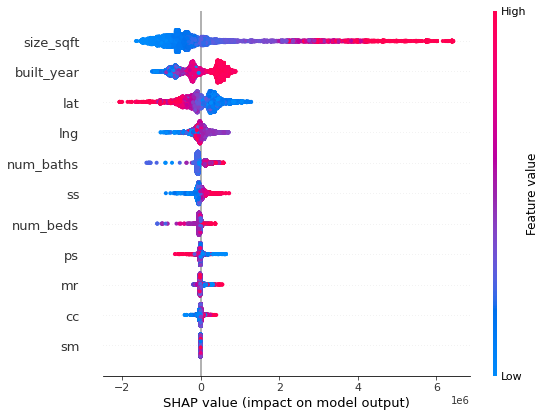

In [91]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(trainnum)
shap.summary_plot(shap_values, trainnum)

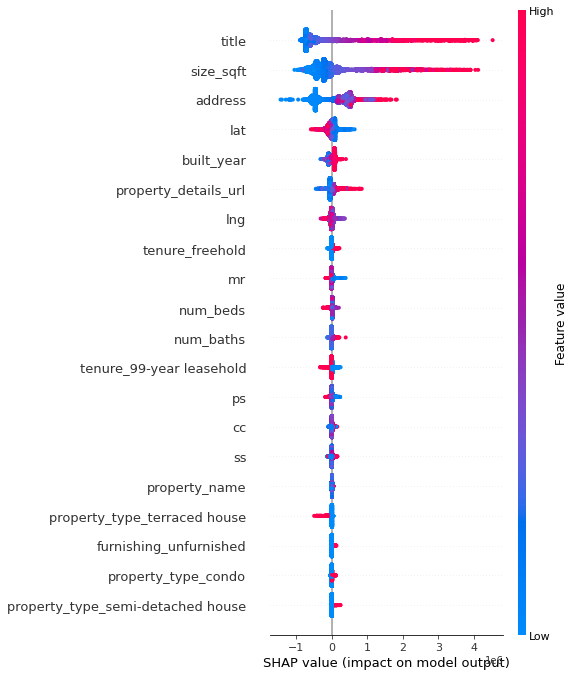

In [90]:
import shap

explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

Partial Dependance Plots

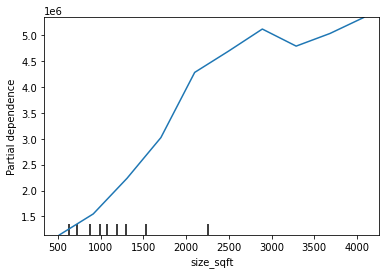

In [97]:
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor

my_plots = plot_partial_dependence(finalgrid_LGB,       
                                   features=[3],
                                   X=trainnum,        
                                   grid_resolution=10)

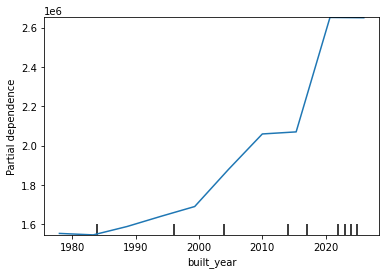

In [100]:
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor

my_plots = plot_partial_dependence(finalgrid_LGB,
                                   features=[0],
                                   X=trainnum,        
                                   grid_resolution=10)

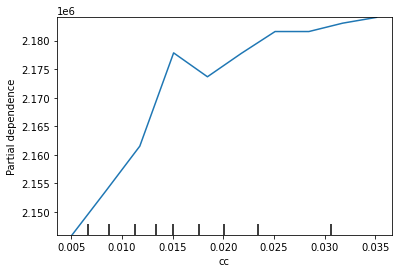

In [107]:
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor

my_plots = plot_partial_dependence(finalgrid_LGB,
                                   features=[6],
                                   X=trainnum,        
                                   grid_resolution=10)

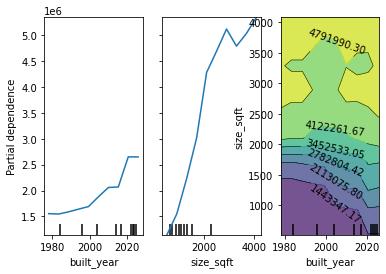

In [102]:
#plot_partial_dependence(my_model, X_train, features, target=y_train)
my_plots = plot_partial_dependence(finalgrid_LGB,       
                                   features=[0,3,[0,3]], 
                                   X=trainnum,        
                                   grid_resolution=10)

Lasso

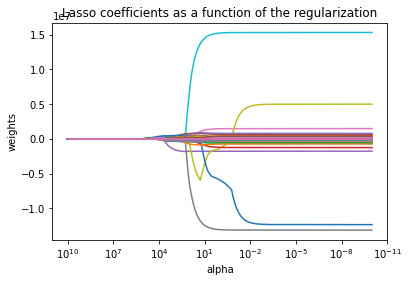

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

n_alphas = 400
alphas = np.logspace(-10, 10, n_alphas)

coefficients = []

for a in alphas:
    lasso = linear_model.Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X, y)
    coefficients.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis

plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

Ridge

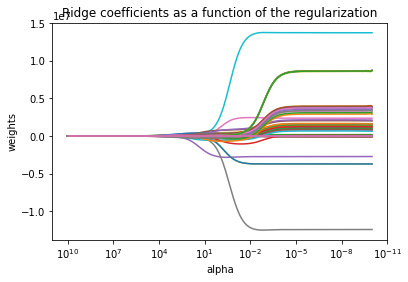

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

n_alphas = 400
alphas = np.logspace(-10, 10, n_alphas)

coefficients = []

for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefficients.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefficients)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis

plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")
plt.show()

In [112]:
figworldmap = px.scatter_mapbox(df4,lat='lat', lon='lng', hover_name="property_name", hover_data=["price"], color="price", zoom=3, height=1200)
figworldmap.update_layout(mapbox_style="open-street-map")